### model training

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split,RandomizedSearchCV

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

import warnings as w
w.filterwarnings('ignore')

In [6]:
df = pd.read_csv('students_performance.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [15]:
# features & target

X = df.drop('math_score',axis=1)

y = df['math_score']

In [16]:
# train-test split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [19]:
# preprocessing : OneHotEncoding

cat_feats = [feat for feat in X_train.select_dtypes('object').columns]
num_feats = [feat for feat in X_train.select_dtypes(exclude='object').columns]

preprocessor = ColumnTransformer([
    ('OneHotEncoding',OneHotEncoder(handle_unknown='ignore',sparse_output=False),cat_feats),
    ('Scaler',StandardScaler(),num_feats)
])

preprocessor.fit(X_train)

X_train_preocessed = preprocessor.transform(X_train)
X_test = preprocessor.transform(X_test)


In [26]:
# evaluate function to measure performance

def evaluate_model(true,predicted):
    score_r2 = r2_score(true,predicted)
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.round(np.sqrt(mse),2)

    return score_r2,mae,rmse

In [21]:
# algos used train

models = {
    'Linear_Regressor' : LinearRegression(),
    'Lasso' : Lasso(),
    'Ridge' : Ridge(),
    'KN_Regressor' : KNeighborsRegressor(),
    'DT_Regressor' : DecisionTreeRegressor(),
    'RF_Regressor' : RandomForestRegressor(),
    'AdaB_Regressor' : AdaBoostRegressor(),
    'XGB_Regressor' : XGBRegressor(),
    'CatB_Regressor':CatBoostRegressor(verbose=False)
}

In [27]:
# Model fitting, predictions , evaluating

model_list=[]
r2_list=[]

for name,model in models.items():
    model.fit(X_train_preocessed,y_train)

    y_train_pred = model.predict(X_train_preocessed)
    y_test_pred = model.predict(X_test)

    train_r2_score, train_mae, train_rmse = evaluate_model(y_train,y_train_pred)
    test_r2_score, test_mae, test_rmse = evaluate_model(y_test,y_test_pred)

    model_list.append(name)

    print(f'{name} performance for training set')
    print(f'r2_score = {train_r2_score}')
    print(f'mae = {train_mae}')
    print(f'rmse = {train_rmse}')

    print('-'*30)

    print(f'{name} performance for test set')
    print(f'r2_score = {test_r2_score}')
    print(f'mae = {test_mae}')
    print(f'rmse = {test_rmse}')

    r2_list.append(test_r2_score)

    print('='*30)

Linear_Regressor performance for training set
r2_score = 0.8743172040139593
mae = 4.266711846071959
rmse = 5.32
------------------------------
Linear_Regressor performance for test set
r2_score = 0.8804332983749563
mae = 4.214763142474852
rmse = 5.39
Lasso performance for training set
r2_score = 0.8072228972801443
mae = 5.205261564799371
rmse = 6.59
------------------------------
Lasso performance for test set
r2_score = 0.825445523514914
mae = 5.155719544015369
rmse = 6.52
Ridge performance for training set
r2_score = 0.8743044675204545
mae = 4.265005112727168
rmse = 5.32
------------------------------
Ridge performance for test set
r2_score = 0.8805917946912827
mae = 4.211112826071161
rmse = 5.39
KN_Regressor performance for training set
r2_score = 0.8556852392267542
mae = 4.5104999999999995
rmse = 5.7
------------------------------
KN_Regressor performance for test set
r2_score = 0.7859277450661302
mae = 5.59
rmse = 7.22
DT_Regressor performance for training set
r2_score = 0.9996534

In [39]:
r2_df = pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model','r2 score'])
r2_df

,Model,r2 score
0,Linear_Regressor,0.880433
1,Lasso,0.825446
2,Ridge,0.880592
3,KN_Regressor,0.785928
4,DT_Regressor,0.734074
5,RF_Regressor,0.856843
6,AdaB_Regressor,0.839102
7,XGB_Regressor,0.827797
8,CatB_Regressor,0.851831


In [43]:
# choosing best performer

model_ = Ridge()

model_.fit(X_train_preocessed,y_train)

y_pred = model_.predict(X_test)

score = r2_score(y_test,y_pred)*100

print(f'Accuracy of model = {score:.3f}')

Accuracy of model = 88.059


Text(0, 0.5, 'Predicted')

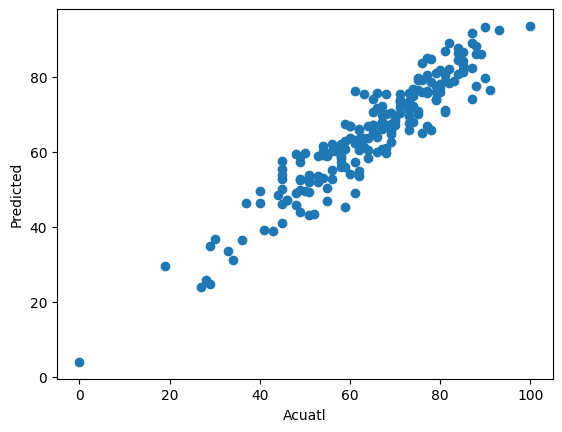

In [51]:
# plotting

plt.scatter(y_test,y_pred)
plt.xlabel('Acuatl')
plt.ylabel("Predicted")

<Axes: xlabel='math_score'>

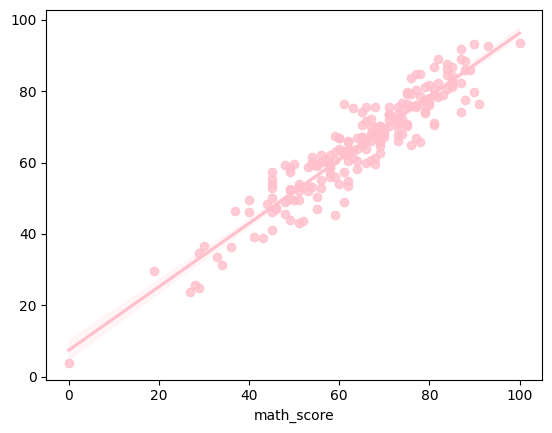

In [52]:
sns.regplot(x=y_test,y=y_pred,color='pink')

In [53]:
pred_df = pd.DataFrame({'Acutal value':y_test,'Predicted value':y_pred,'Difference':y_test - y_pred})
pred_df

,Acutal value,Predicted value,Difference
521,91,76.398746,14.601254
737,53,58.843165,-5.843165
740,80,76.992035,3.007965
660,74,76.806200,-2.806200
411,84,87.614981,-3.614981
...,...,...,...
408,52,43.491767,8.508233
332,62,62.170101,-0.170101
208,74,67.910260,6.089740
613,65,67.061256,-2.061256
